In [51]:
import pandas as pd          # import pandas
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("./Dataset/DataCoSupplyChainDataset.csv", encoding='latin-1')
df.shape

(180519, 53)

In [53]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [54]:
columns_to_drop = [
    'Type', 'Order Item Discount Rate', 'Order Item Profit Ratio',
    'Benefit per order', 'Sales per customer',
    'Category Id', 'Customer Email', 'Customer Password', 'Department Id',
    'Order Item Cardprod Id', 'Order Item Discount Rate',
    'Order Item Profit Ratio', 'Order Zipcode', 'Order Status',
    'Product Card Id', 'Product Description', 'Product Image', 'Product Status', 'Customer Zipcode', 'Order Customer Id',
    'Category Id', 'Product Category Id', 'Order Item Product Price'
]

df = df.drop(columns=columns_to_drop)


In [55]:
rename_columns = {
    "Days for shipping (real)": "Actual shipping days",
    "Days for shipment (scheduled)": "Expected Shipping days",
    "Late_delivery_risk": "Is late Delivery",
    "Customer City": "Warehouse City",
    "Customer Country": "Warehouse Country",  
    "Customer State": "Warehouse State",
    "Customer Street": "Warehouse street",
    "Customer zipcode": "warehouse zipcode",  
    "Order Item Id": "Product ID",
    "Order Item Quantity": "Order Product Quantity",
    "Sales": "Cost price",
    "Order Item Total": "Price after discount",
    "Order Profit Per Order": "Profit amount",
    "shipping date (DateOrders)": "Delivery date",
    "order date (DateOrders)": "Order date"
}

df = df.rename(columns=rename_columns)

In [56]:
df.shape

(180519, 33)

In [57]:
# remove trailing and leading spaces from column names and replace spaces with underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [58]:
df.columns

Index(['actual_shipping_days', 'expected_shipping_days', 'delivery_status',
       'is_late_delivery', 'category_name', 'warehouse_city',
       'warehouse_country', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_segment', 'warehouse_state', 'warehouse_street',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_date', 'order_id', 'order_item_discount',
       'product_id', 'order_product_quantity', 'cost_price',
       'price_after_discount', 'profit_amount', 'order_region', 'order_state',
       'product_name', 'product_price', 'delivery_date', 'shipping_mode'],
      dtype='object')

In [59]:
# change order_date and deliver_date to format "YYYY-MM-DD"
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

df['order_date'] = df['order_date'].dt.strftime('%Y-%m-%d')
df['delivery_date'] = df['delivery_date'].dt.strftime('%Y-%m-%d')

In [60]:
# replace value 'Books ' with 'Books' in column category_name
df['category_name'] = df['category_name'].str.strip()

df_books = df[df['category_name'] == 'Books']

df_books.shape

(405, 33)

In [61]:
# randomly change the values of 5% of rows in price after discount column to so large in books category to see the effect of outliers
df_books['price_after_discount'] = np.where(np.random.rand(len(df_books)) < 0.05, 100, df_books['price_after_discount'])

C:\Users\krishnateja\AppData\Local\Temp\ipykernel_2872\1583650983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books['price_after_discount'] = np.where(np.random.rand(len(df_books)) < 0.05, 100, df_books['price_after_discount'])


In [62]:
# show how many rows have price after discount greater than 70
df_books[df_books['price_after_discount'] > 70].shape

(24, 33)

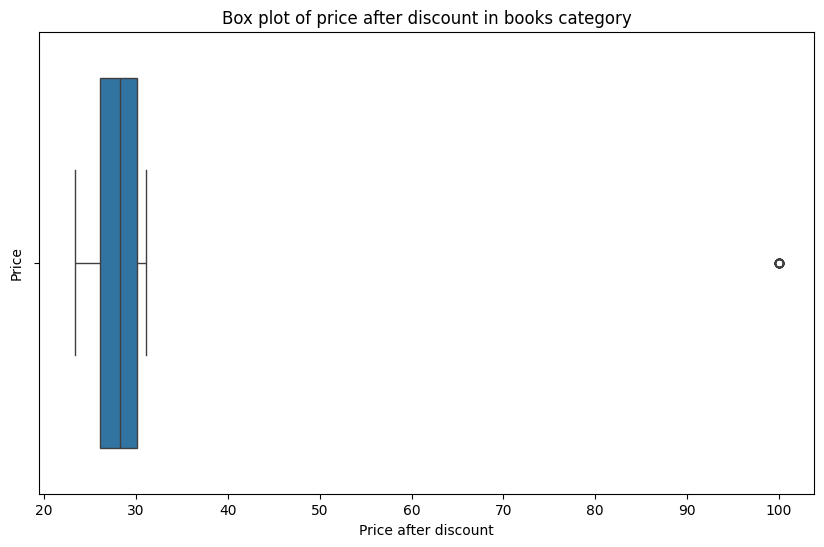

In [63]:
# draw a box plot on price after discount on books category with title, x-axis label and y-axis label
plt.figure(figsize=(10, 6))
plt.title('Box plot of price after discount in books category')
plt.xlabel('Price after discount')
plt.ylabel('Price')
sns.boxplot(data=df_books, x='price_after_discount')
plt.show()

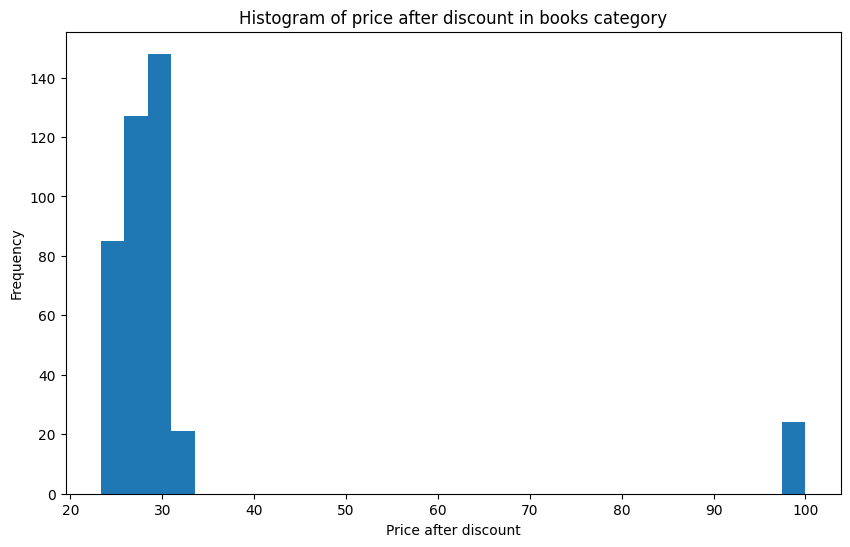

In [64]:
# histogram plot for price after discount and profit amount with title and x-axis label and y label
plt.figure(figsize=(10, 6))
plt.title('Histogram of price after discount in books category')
plt.xlabel('Price after discount')
plt.ylabel('Frequency')
plt.hist(df_books['price_after_discount'], bins=30)
plt.show()

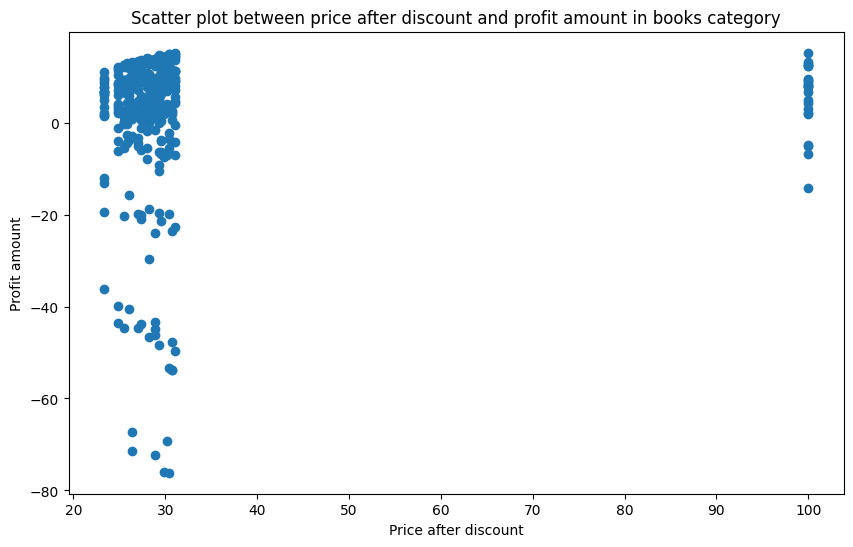

In [65]:
# give  scatter plot between price after discount and profit amount with title and x-axis label and y label
plt.figure(figsize=(10, 6))
plt.title('Scatter plot between price after discount and profit amount in books category')
plt.xlabel('Price after discount')
plt.ylabel('Profit amount')
plt.scatter(df_books['price_after_discount'], df_books['profit_amount'])
plt.show()

In [66]:
# remove the columns from books caregory where price after discount is greater than 70
df_books = df_books[df_books['price_after_discount'] <= 70]

df_books.shape

(381, 33)

In [67]:
# replace the price_after_discount column for books category in df with df_books
df = df[df['category_name'] != 'Books']
df = pd.concat([df, df_books])
df.shape

(180495, 33)

In [68]:
# 3. b
# find the missing value in all the columns
df.isnull().sum()

actual_shipping_days      0
expected_shipping_days    0
delivery_status           0
is_late_delivery          0
category_name             0
warehouse_city            0
warehouse_country         0
customer_fname            0
customer_id               0
customer_lname            8
customer_segment          0
warehouse_state           0
warehouse_street          0
department_name           0
latitude                  0
longitude                 0
market                    0
order_city                0
order_country             0
order_date                0
order_id                  0
order_item_discount       0
product_id                0
order_product_quantity    0
cost_price                0
price_after_discount      0
profit_amount             0
order_region              0
order_state               0
product_name              0
product_price             0
delivery_date             0
shipping_mode             0
dtype: int64

In [69]:
# induce some missing values in order_item_discount
df['order_item_discount'] = np.where(np.random.rand(len(df)) < 0.05, np.nan, df['order_item_discount']) 

In [70]:
df.isnull().sum()

actual_shipping_days         0
expected_shipping_days       0
delivery_status              0
is_late_delivery             0
category_name                0
warehouse_city               0
warehouse_country            0
customer_fname               0
customer_id                  0
customer_lname               8
customer_segment             0
warehouse_state              0
warehouse_street             0
department_name              0
latitude                     0
longitude                    0
market                       0
order_city                   0
order_country                0
order_date                   0
order_id                     0
order_item_discount       8876
product_id                   0
order_product_quantity       0
cost_price                   0
price_after_discount         0
profit_amount                0
order_region                 0
order_state                  0
product_name                 0
product_price                0
delivery_date                0
shipping

In [71]:
# fill the missing values in order_item_discount with mean
df['order_item_discount'] = df['order_item_discount'].fillna(df['order_item_discount'].mean())

df.isnull().sum()

actual_shipping_days      0
expected_shipping_days    0
delivery_status           0
is_late_delivery          0
category_name             0
warehouse_city            0
warehouse_country         0
customer_fname            0
customer_id               0
customer_lname            8
customer_segment          0
warehouse_state           0
warehouse_street          0
department_name           0
latitude                  0
longitude                 0
market                    0
order_city                0
order_country             0
order_date                0
order_id                  0
order_item_discount       0
product_id                0
order_product_quantity    0
cost_price                0
price_after_discount      0
profit_amount             0
order_region              0
order_state               0
product_name              0
product_price             0
delivery_date             0
shipping_mode             0
dtype: int64

In [72]:
# induce some missing values in order product quantity
df['order_product_quantity'] = np.where(np.random.rand(len(df)) < 0.05, np.nan, df['order_product_quantity'])

In [73]:
df.isnull().sum()

actual_shipping_days         0
expected_shipping_days       0
delivery_status              0
is_late_delivery             0
category_name                0
warehouse_city               0
warehouse_country            0
customer_fname               0
customer_id                  0
customer_lname               8
customer_segment             0
warehouse_state              0
warehouse_street             0
department_name              0
latitude                     0
longitude                    0
market                       0
order_city                   0
order_country                0
order_date                   0
order_id                     0
order_item_discount          0
product_id                   0
order_product_quantity    9063
cost_price                   0
price_after_discount         0
profit_amount                0
order_region                 0
order_state                  0
product_name                 0
product_price                0
delivery_date                0
shipping

In [74]:
# use product price, order item discount and price after discount to fill the missing values in order product quantity and floor the value
df['order_product_quantity'] = df['order_product_quantity'].fillna((df['price_after_discount'] - df['order_item_discount']) / df['product_price']).apply(np.floor)

In [75]:
df.isnull().sum()

actual_shipping_days      0
expected_shipping_days    0
delivery_status           0
is_late_delivery          0
category_name             0
warehouse_city            0
warehouse_country         0
customer_fname            0
customer_id               0
customer_lname            8
customer_segment          0
warehouse_state           0
warehouse_street          0
department_name           0
latitude                  0
longitude                 0
market                    0
order_city                0
order_country             0
order_date                0
order_id                  0
order_item_discount       0
product_id                0
order_product_quantity    0
cost_price                0
price_after_discount      0
profit_amount             0
order_region              0
order_state               0
product_name              0
product_price             0
delivery_date             0
shipping_mode             0
dtype: int64

In [76]:
# find in which column null values are present
df = df.fillna(value=0)

In [77]:
df['delivery_status'].value_counts()

delivery_status
Late delivery        98961
Advance shipping     41585
Shipping on time     32195
Shipping canceled     7754
Name: count, dtype: int64

In [78]:
df['category_name'].value_counts().head(25)

category_name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Crafts                    484
Name: count, dtype: int64

In [79]:
df['warehouse_city'].value_counts().head(25)

warehouse_city
Caguas             66758
Chicago             3885
Los Angeles         3416
Brooklyn            3410
New York            1816
Philadelphia        1576
Bronx               1499
San Diego           1437
Miami               1314
Houston             1297
Las Vegas           1164
Dallas              1029
Aurora              1015
Detroit              958
Phoenix              945
San Jose             943
Cleveland            784
Lancaster            762
San Antonio          730
Memphis              707
Virginia Beach       691
El Paso              649
Fort Lauderdale      646
Columbus             642
Washington           627
Name: count, dtype: int64

In [80]:
unique_delivery_status = df['delivery_status'].unique()
print(unique_delivery_status)

['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']


In [81]:
unique_category_names = df['category_name'].unique()
print(unique_category_names)

['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby' 'Fishing' 'DVDs' 'CDs' 'Garden' 'Hockey' 'Pet Supplies'
 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games' 'Books']


In [82]:
unique_warehouse_cities = df['warehouse_city'].unique()
print(unique_warehouse_cities)

['Caguas' 'San Jose' 'Los Angeles' 'Tonawanda' 'Miami' 'San Ramon'
 'Freeport' 'Salinas' 'Peabody' 'Canovanas' 'Paramount' 'Mount Prospect'
 'Long Beach' 'Rancho Cordova' 'Billings' 'Wilkes Barre' 'Roseville'
 'Bellflower' 'Wheaton' 'Detroit' 'Dallas' 'Carlisle' 'Newark'
 'Panorama City' 'Atlanta' 'Fremont' 'Rochester' 'Bayamon' 'Guayama'
 'Juana Diaz' 'Fort Washington' 'Bakersfield' 'Corona' 'Cincinnati'
 'Germantown' 'Carrollton' 'Houston' 'Ewa Beach' 'Lakewood' 'Rome' 'Vista'
 'Fort Worth' 'Fond Du Lac' 'Philadelphia' 'Ontario' 'Oviedo' 'Buffalo'
 'Honolulu' 'Oceanside' 'North Tonawanda' 'Clovis' 'Jamaica'
 'Granite City' 'Medford' 'Pomona' 'Tempe' 'Santa Ana' 'York' 'Aurora'
 'Simi Valley' 'Silver Spring' 'Saint Paul' 'San Antonio' 'Bronx'
 'Greenville' 'Morristown' 'San Diego' 'Oxnard' 'Albuquerque' 'Amarillo'
 'Lutz' 'Bend' 'East Brunswick' 'Lancaster' 'Hampton' 'New York'
 'Porterville' 'Portland' 'Strongsville' 'El Paso' 'Del Rio' 'Bountiful'
 'Kent' 'Chicago' 'Plymouth' 'Far R

In [83]:
#One hot encoding on the Delivery Status column
df_one_hot = pd.get_dummies(df['delivery_status'], prefix='Status')
df = pd.concat([df, df_one_hot], axis=1)

In [84]:
df.columns

Index(['actual_shipping_days', 'expected_shipping_days', 'delivery_status',
       'is_late_delivery', 'category_name', 'warehouse_city',
       'warehouse_country', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_segment', 'warehouse_state', 'warehouse_street',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_date', 'order_id', 'order_item_discount',
       'product_id', 'order_product_quantity', 'cost_price',
       'price_after_discount', 'profit_amount', 'order_region', 'order_state',
       'product_name', 'product_price', 'delivery_date', 'shipping_mode',
       'Status_Advance shipping', 'Status_Late delivery',
       'Status_Shipping canceled', 'Status_Shipping on time'],
      dtype='object')

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Product Price Normalized'] = scaler.fit_transform(df[['product_price']])
df["Product Price Normalized"].describe()

count    180495.000000
mean          0.065958
std           0.070219
min           0.000000
25%           0.020106
50%           0.025126
75%           0.095477
max           1.000000
Name: Product Price Normalized, dtype: float64

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Profit amount Standardized'] = scaler.fit_transform(df[['profit_amount']])
df['Profit amount Standardized'].describe()

count    1.804950e+05
mean    -6.015177e-17
std      1.000003e+00
min     -4.114284e+01
25%     -1.433564e-01
50%      9.137170e-02
75%      4.100236e-01
max      8.519945e+00
Name: Profit amount Standardized, dtype: float64

In [87]:
delivery_status_mode = df['delivery_status'].mode()[0]
category_name_mode = df['category_name'].mode()[0]
warehouse_city_mode = df['warehouse_city'].mode()[0]

print("Mode of Delivery Status:", delivery_status_mode)
print("Mode of Category Name:", category_name_mode)
print("Mode of Warehouse City:", warehouse_city_mode)

Mode of Delivery Status: Late delivery
Mode of Category Name: Cleats
Mode of Warehouse City: Caguas


In [88]:
discount_mean = df['order_item_discount'].mean()
profit_mean = df['profit_amount'].mean()
cost_price_mean = df['cost_price'].mean()

print("discount_mean:", discount_mean)
print("profit_mean:", profit_mean)
print("cost_price_mean:", cost_price_mean)

discount_mean: 20.68495045658379
profit_mean: 21.97714232555076
cost_price_mean: 203.79505855221342


In [89]:
discount_std = df['order_item_discount'].std()
profit_std = df['profit_amount'].std()
cost_price_std = df['cost_price'].std()

print("Standard Deviation of Order Item Discount:", discount_std)
print("Standard Deviation of Profit amount:", profit_std)
print("Standard Deviation of Cost price:", cost_price_std)

Standard Deviation of Order Item Discount: 21.292194763828547
Standard Deviation of Profit amount: 104.44026931464003
Standard Deviation of Cost price: 132.266879766227


In [90]:
cl = ['product_price', 'order_item_discount',  'profit_amount']
cm=df[cl].corr()
print(cm)

                     product_price  order_item_discount  profit_amount
product_price             1.000000             0.477395       0.103447
order_item_discount       0.477395             1.000000       0.064178
profit_amount             0.103447             0.064178       1.000000


Visualisation

In [91]:
df.columns

Index(['actual_shipping_days', 'expected_shipping_days', 'delivery_status',
       'is_late_delivery', 'category_name', 'warehouse_city',
       'warehouse_country', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_segment', 'warehouse_state', 'warehouse_street',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_date', 'order_id', 'order_item_discount',
       'product_id', 'order_product_quantity', 'cost_price',
       'price_after_discount', 'profit_amount', 'order_region', 'order_state',
       'product_name', 'product_price', 'delivery_date', 'shipping_mode',
       'Status_Advance shipping', 'Status_Late delivery',
       'Status_Shipping canceled', 'Status_Shipping on time',
       'Product Price Normalized', 'Profit amount Standardized'],
      dtype='object')

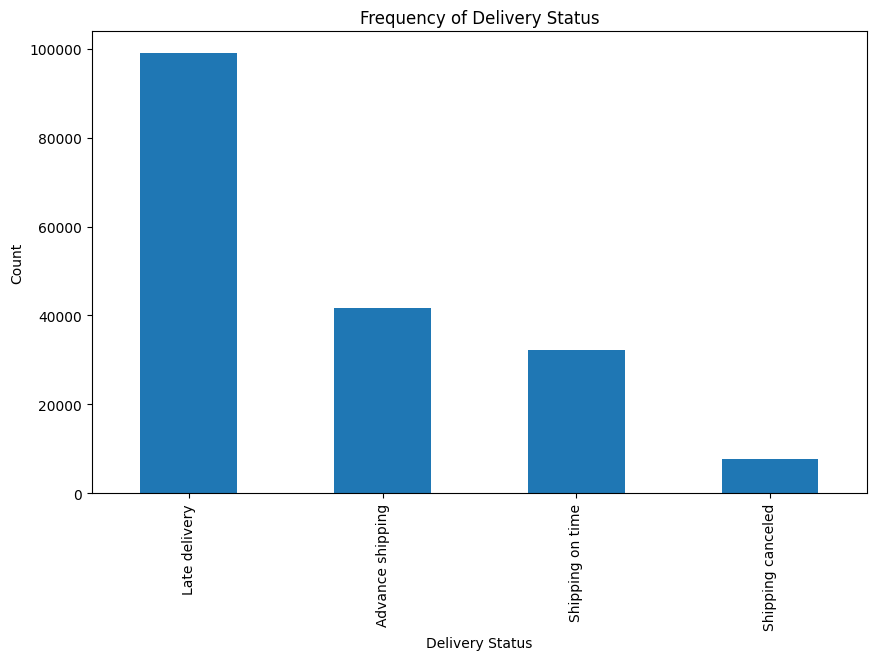

In [92]:
# Bar chart for categorical data
plt.figure(figsize=(10, 6))
df['delivery_status'].value_counts().plot(kind='bar')
plt.title('Frequency of Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()

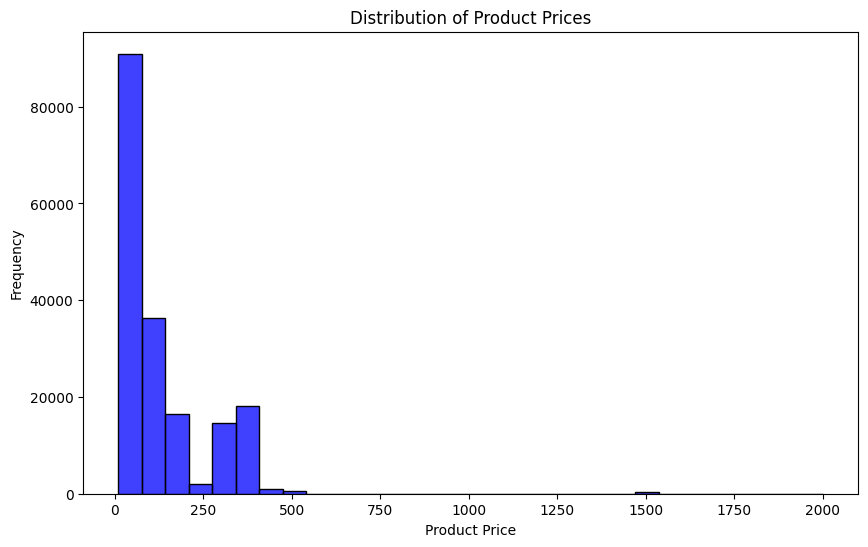

In [93]:
# Histogram for Product Price
plt.figure(figsize=(10, 6))
sns.histplot(df['product_price'], bins=30, kde=False, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\krishnateja\AppData\Local\Temp\ipykernel_2872\1471234433.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_profit = df.groupby('price_range')['profit_amount'].mean().reset_index()


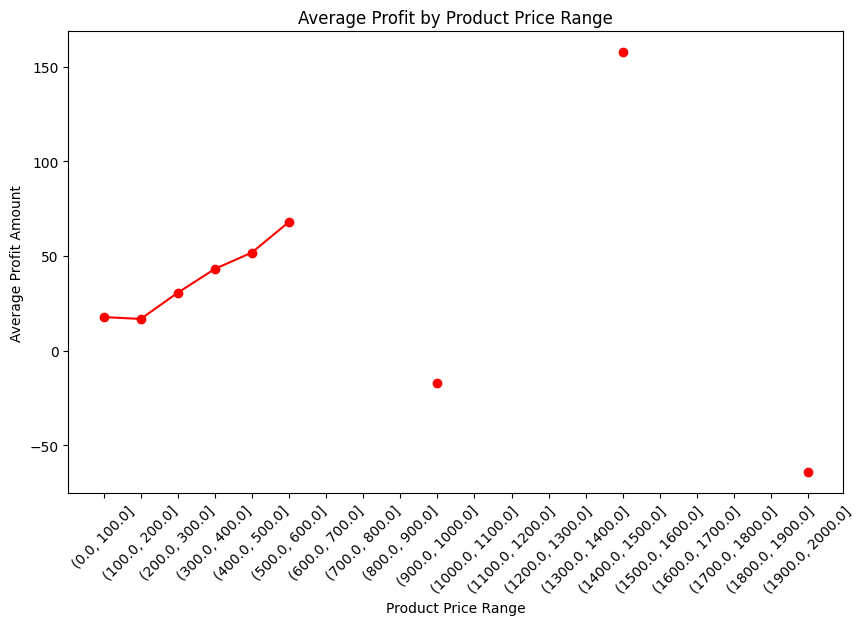

In [94]:
df['price_range'] = pd.cut(df['product_price'], bins=np.arange(0, df['product_price'].max() + 100, 100))

price_profit = df.groupby('price_range')['profit_amount'].mean().reset_index()

# Line Chart for Average Profit by Product Price Range
plt.figure(figsize=(10, 6))
plt.plot(price_profit['price_range'].astype(str), price_profit['profit_amount'], marker='o' , color='red')
plt.title('Average Profit by Product Price Range')
plt.xlabel('Product Price Range')
plt.ylabel('Average Profit Amount')
plt.xticks(rotation=45)
plt.show()

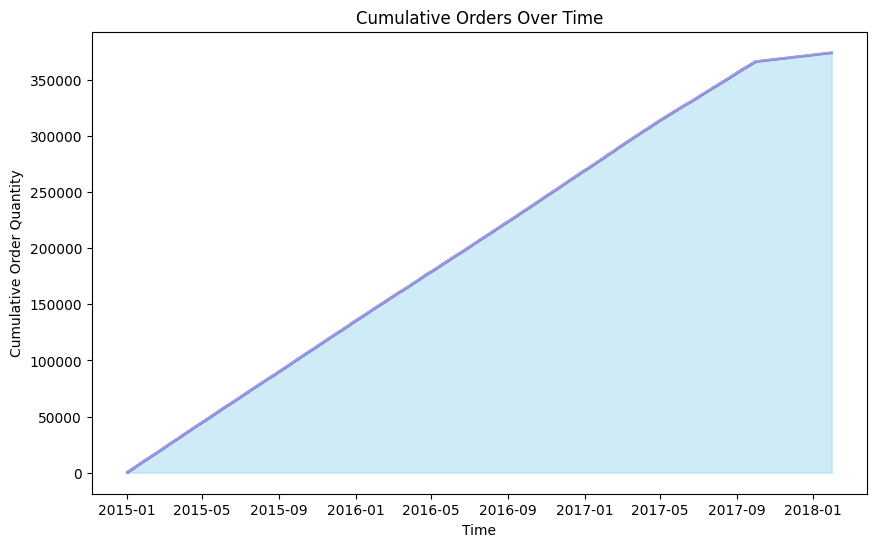

In [95]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.sort_values('order_date', inplace=True)  # Make sure the data is sorted by date
df['cumulative_orders'] = df['order_product_quantity'].cumsum()

plt.figure(figsize=(10, 6))
plt.fill_between(df['order_date'], df['cumulative_orders'], color="skyblue", alpha=0.4)
plt.plot(df['order_date'], df['cumulative_orders'], color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Cumulative Orders Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Order Quantity')
plt.show()

In [96]:
# reorder columns in dataframe in a specific order
df = df[[
    'order_id', 'order_date', 'delivery_date', 'actual_shipping_days', 'expected_shipping_days', 'delivery_status',
'is_late_delivery', 'warehouse_street', 'warehouse_city', 'warehouse_state',
'warehouse_country', 'order_city', 'order_state', 'order_country', 'order_region', 'market', 'latitude', 'longitude', 'shipping_mode',
'product_id', 'product_name', 'category_name', 'department_name',
'customer_id', 'customer_fname', 'customer_lname', 'customer_segment',
'cost_price', 'profit_amount', 'product_price', 'order_item_discount', 'price_after_discount', 'order_product_quantity'
]]

# write the dataframe into csv file
df.to_csv("./Dataset/SupplyChainFinal.csv", index=False)